1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
sp = pd.read_csv('data/StudentsPerformance.csv')

In [10]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The dataset does not contain any null values

Finding Unique Values for Categorical variables

In [18]:
attributes = list(sp.columns)

In [23]:
attributes = ['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',]

In [24]:
for column in attributes:
    unique_values = sp[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'gender': ['female' 'male']
Unique values in column 'race/ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in column 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in column 'lunch': ['standard' 'free/reduced']
Unique values in column 'test preparation course': ['none' 'completed']


In [25]:
sp.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


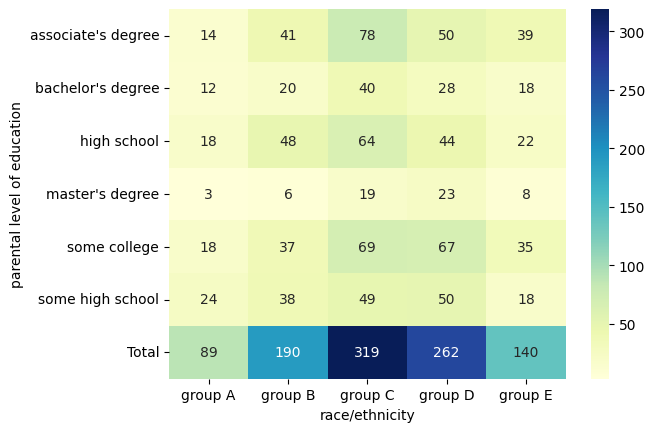

In [40]:
contingency_table = pd.crosstab( sp['parental level of education'],sp['race/ethnicity'])
# Add row totals

contingency_table.loc['Total'] = contingency_table.sum(axis=0)

contingency_table = contingency_table.astype(int)

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.show()

This heatmap shows the distribution of parental education levels across different race/ethnicity groups. Key findings include:

Highest Count: Group C has the highest total count (319), with "high school" (64) and "associate's degree" (78) being prominent parental education levels.

Lowest Count: Group A has the lowest total count (89), with "master's degree" (3) being the least frequent parental education level across all groups.

In [150]:
def plot_stacked_bar(df, race_col, lunch_col, figsize=(10, 6)):
    """
    Plot a stacked bar chart of lunch types by race/ethnicity.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame
    race_col (str): Name of the column containing race/ethnicity data
    lunch_col (str): Name of the column containing lunch data
    figsize (tuple): Figure size (width, height)
    
    Returns:
    matplotlib.figure.Figure: The created figure object
    """
    
    # Create the stacked bar plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Group data and create stacked bar chart
    grouped_data = df.groupby([race_col, lunch_col]).size().unstack()
    ax = grouped_data.plot(kind='bar', stacked=True, ax=ax)
    
    # Annotate each segment
    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    
    # Customize the plot
    plt.title(f'{lunch_col.capitalize()} Distribution by {race_col.capitalize()}')
    plt.xlabel(race_col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=lunch_col.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

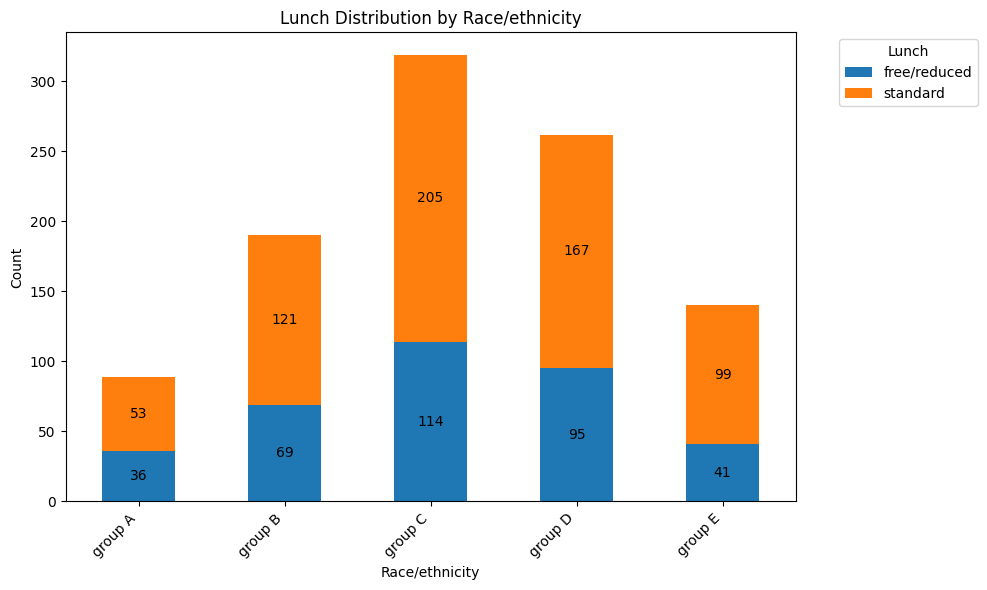

In [151]:
fig = plot_stacked_bar(sp, 'race/ethnicity', 'lunch')
plt.show()

This graph shows the distribution of lunch types by race/ethnicity. Group C has the highest total count (319), with the majority opting for standard lunch (205), while Group A has the lowest count (89), with a higher proportion of free/reduced lunches (36).

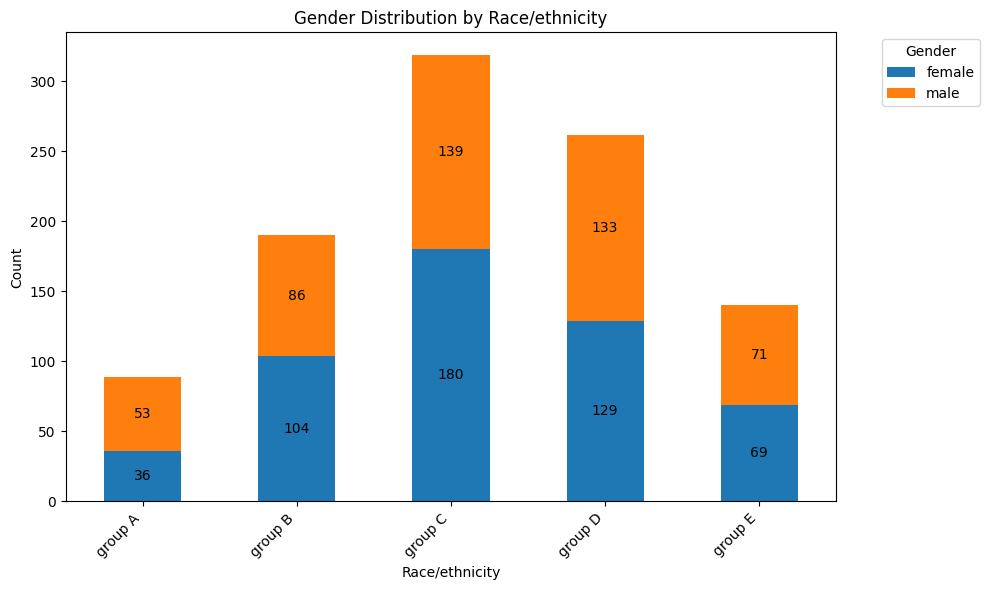

In [152]:
fig = plot_stacked_bar(sp, 'race/ethnicity', 'gender')
plt.show()

This graph shows the gender distribution across race/ethnicity groups. Group C has the highest representation (319 total), with a larger proportion of females (180), while Group A has the lowest representation (89 total), with males slightly outnumbering females.

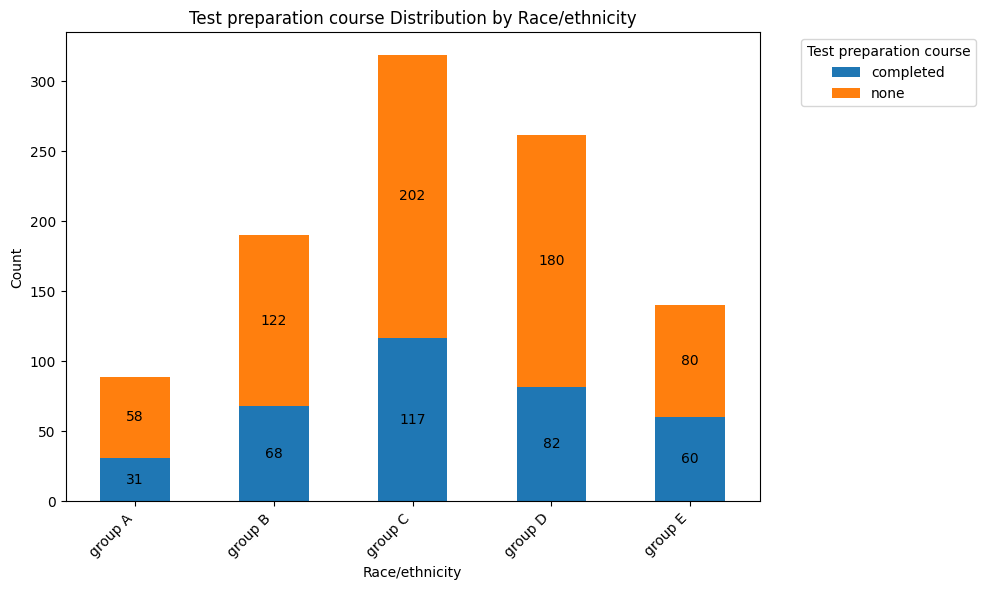

In [153]:
fig = plot_stacked_bar(sp, 'race/ethnicity', 'test preparation course')
plt.show()

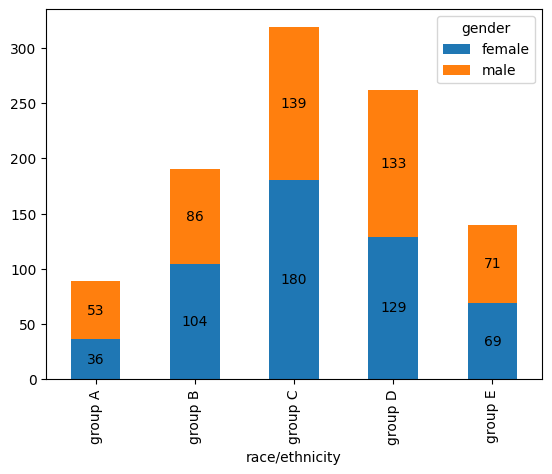

In [47]:
ax = sp.groupby(['race/ethnicity', 'gender'])['test preparation course'].size().unstack().plot(kind='bar', stacked=True)
# Annotate each segment
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.show()

This graph shows the distribution of test preparation course completion across race/ethnicity groups. Group C has the highest participation (319 total), with 117 completing the course, while Group A has the lowest participation (89 total), with only 31 completing the course, highlighting disparities in preparation efforts

### Calculating Average and Total Scores for each student

In [51]:
sp['Total'] = sp.select_dtypes(include=['int64']).sum(axis=1)

In [52]:
sp['average'] = sp.select_dtypes(include=['int64','float64']).mean(axis=1)

In [53]:
sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,109.0
1,female,group C,some college,standard,completed,69,90,88,247,123.5
2,female,group B,master's degree,standard,none,90,95,93,278,139.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,74.0
4,male,group C,some college,standard,none,76,78,75,229,114.5


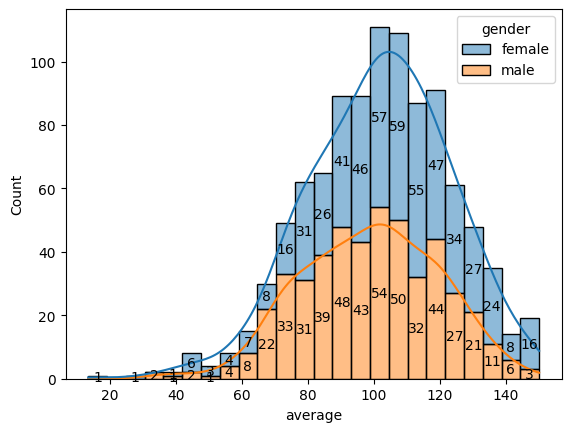

In [60]:
ax = sns.histplot(data=sp, x='average', hue='gender', multiple='stack', stat='count',kde=True, common_norm=False)

# Get the patches (bars) from the plot
patches = ax.patches

# Add annotations
for rect in patches:
    height = rect.get_height()
    if height > 0:  # Only annotate visible bars
        ax.text(
            rect.get_x() + rect.get_width()/2., 
            rect.get_y() + height/2.,
            f'{int(height)}',
            ha='center', 
            va='center'
        )

plt.show()

This histogram shows the distribution of average scores by gender. Females generally outperform males, with a higher concentration of scores between 90 and 110, while males exhibit a broader spread and slightly lower peak performance.

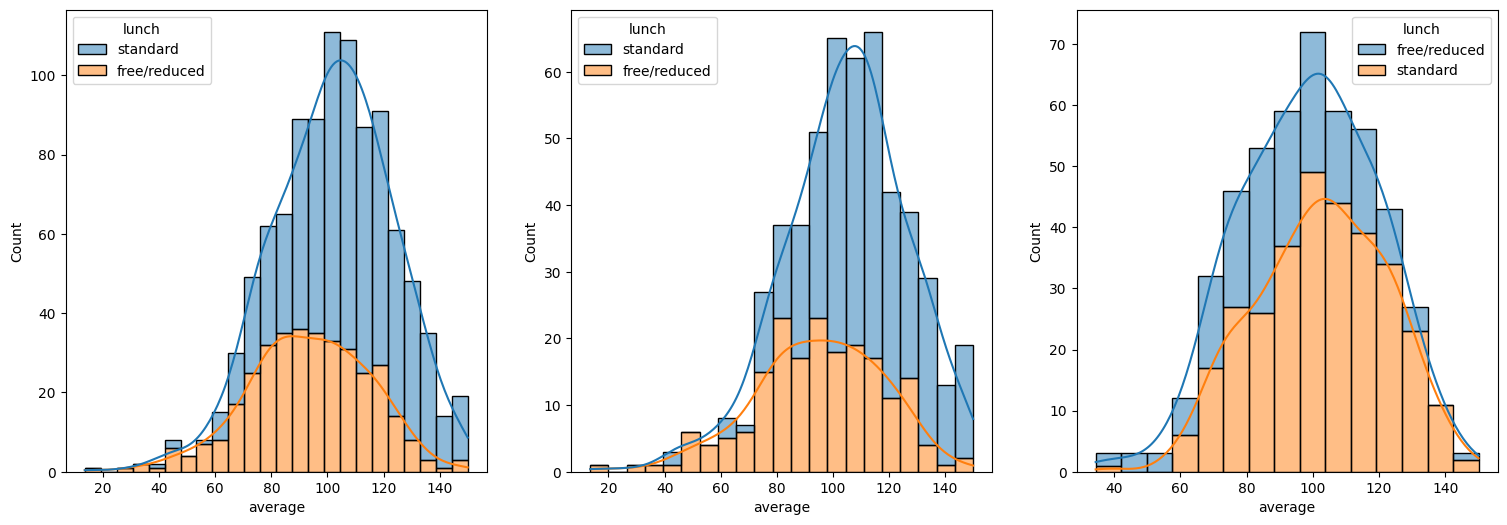

In [65]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=sp,x='average',kde=True,hue='lunch',multiple='stack')
plt.subplot(142)
sns.histplot(data=sp[sp.gender=='female'],x='average',kde=True,hue='lunch',multiple='stack')
plt.subplot(143)
sns.histplot(data=sp[sp.gender=='male'],x='average',kde=True,hue='lunch',multiple='stack')
plt.show()

These histograms show the distribution of average scores for students based on lunch type. Students with standard lunches consistently perform better, with higher peaks around 100-120, while those with free/reduced lunches have lower averages and a wider spread.

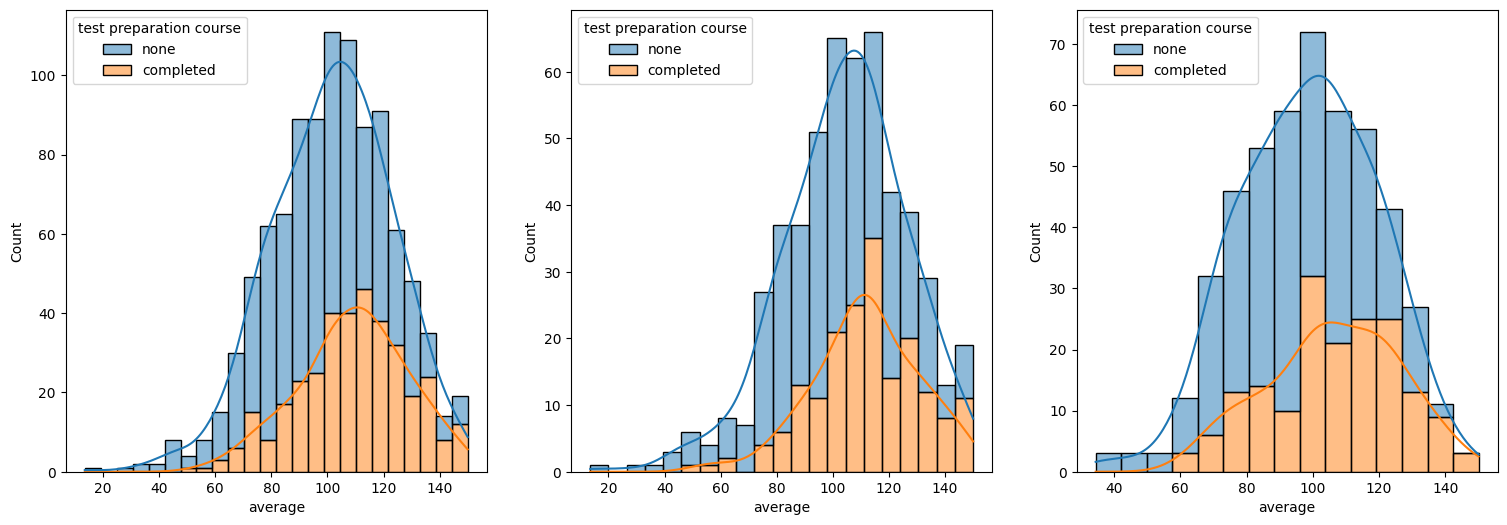

In [66]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=sp,x='average',kde=True,hue='test preparation course',multiple='stack')
plt.subplot(142)
sns.histplot(data=sp[sp.gender=='female'],x='average',kde=True,hue='test preparation course',multiple='stack')
plt.subplot(143)
sns.histplot(data=sp[sp.gender=='male'],x='average',kde=True,hue='test preparation course',multiple='stack')
plt.show()

These graphs show the distribution of average scores for students based on test preparation course completion. Students who completed the course consistently perform better, with higher concentration around 100-120, while those who did not complete the course have a wider spread and lower peak performance.

### Calculating Number of Centums in Math, Reading and Writing

In [76]:
centum_count_math = (sp['math score'] == 100).sum()
centum_count_reading = (sp['reading score'] == 100).sum()
centum_count_writing = (sp['writing score'] == 100).sum()
centums = ' Number of Centum in Math {0} \n Number of Centum in Reading {1} \n Number of Centum in Writing {2}'.format(centum_count_math,centum_count_reading,centum_count_writing)
print(centums)

 Number of Centum in Math 7 
 Number of Centum in Reading 17 
 Number of Centum in Writing 14


### Plotting graphs for average Math, Reading and Writing across all cantegorical variables

In [161]:
def plot_scores_by_gender(df, gender_col, score_cols=['writing score', 'reading score', 'math score'], figsize=(18, 6)):
    """
    Plot average scores by gender for specified subjects.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame
    gender_col (str): Name of the column containing gender data
    score_cols (list): List of score column names (default: ['writing score', 'reading score', 'math score'])
    figsize (tuple): Figure size (width, height)
    
    Returns:
    matplotlib.figure.Figure: The created figure object
    """
    
    fig, axes = plt.subplots(1, len(score_cols), figsize=figsize, sharey=True)
    
    for i, score_col in enumerate(score_cols):
        average_scores = df.groupby(gender_col)[score_col].mean()
        average_scores.plot(kind='bar', color=['blue', 'pink'], edgecolor='black', ax=axes[i])
        axes[i].set_title(f'{score_col.capitalize()} by {gender_col.capitalize()}')
        axes[i].set_xlabel(gender_col.capitalize())
        axes[i].tick_params(axis='x', rotation=0)
        if i == 0:
            axes[i].set_ylabel('Average Score')
        
        for index, value in enumerate(average_scores):
            axes[i].text(index, value + 0.5, f'{value:.1f}', ha='center')
    
    plt.tight_layout()
    return fig

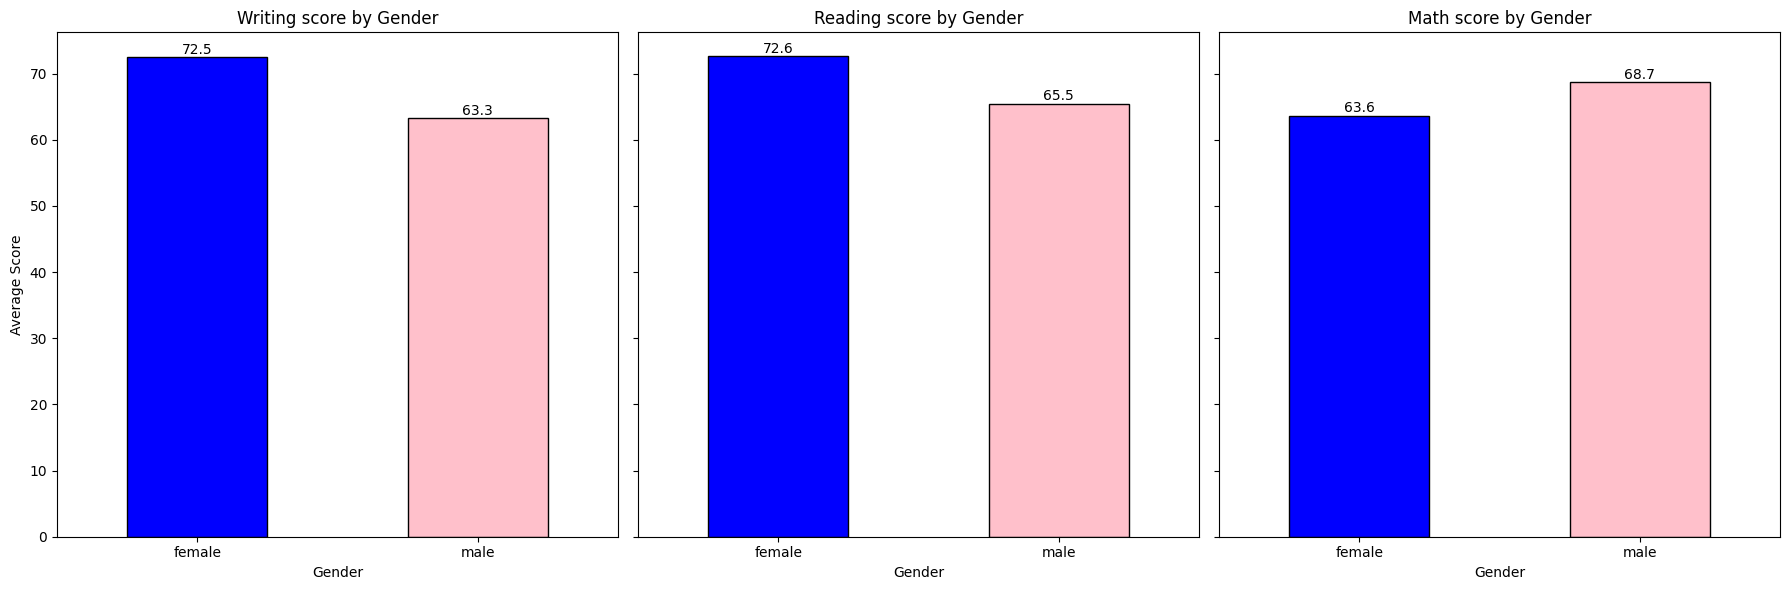

In [162]:
fig = plot_scores_by_gender(sp, 'gender')
plt.show()

These bar charts show the average scores in writing, reading, and math by gender. Females outperform males in writing (72.5 vs. 63.3) and reading (72.6 vs. 65.5), while males perform better in math (68.7 vs. 63.6), indicating subject-specific strengths by gender.

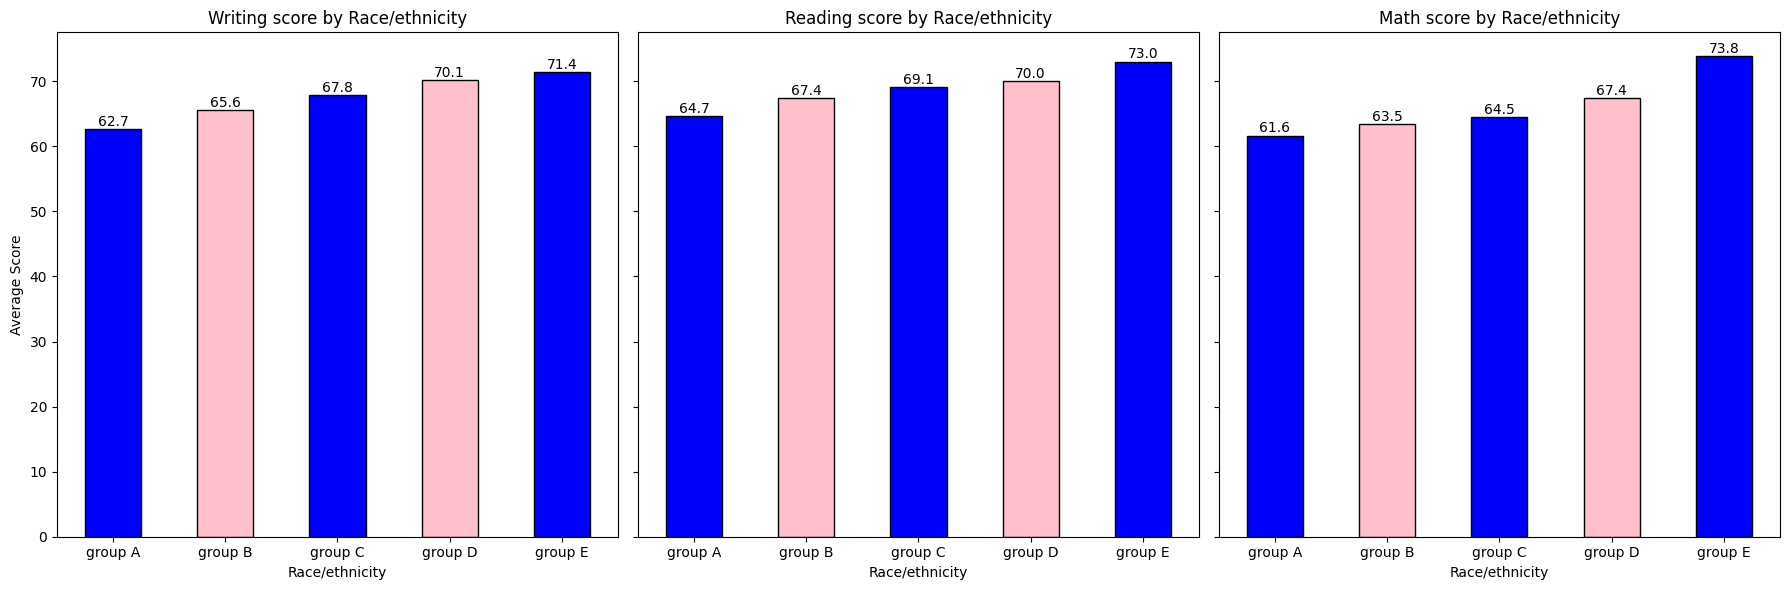

In [163]:
fig = plot_scores_by_gender(sp, 'race/ethnicity')
plt.show()

These bar charts show the average scores in writing, reading, and math across race/ethnicity groups. Group E consistently achieves the highest scores in all subjects, while Group A has the lowest, highlighting disparities in academic performance among different racial/ethnic groups.

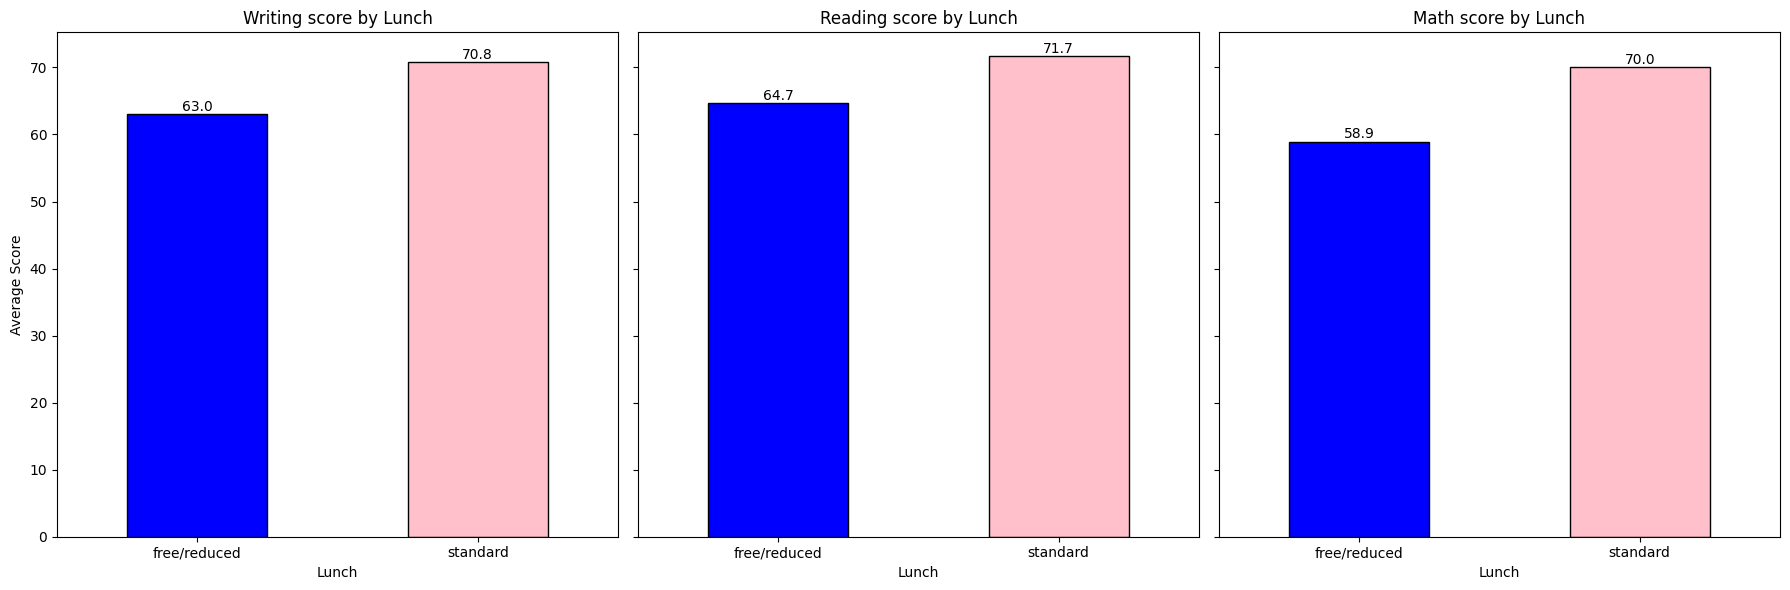

In [164]:
fig = plot_scores_by_gender(sp, 'lunch')
plt.show()

The graphs show that students with standard lunches consistently outperform those with free/reduced lunches across all subjects. The largest gap is in math scores (70.0 vs. 58.9), highlighting the potential impact of nutritional access on academic performance.

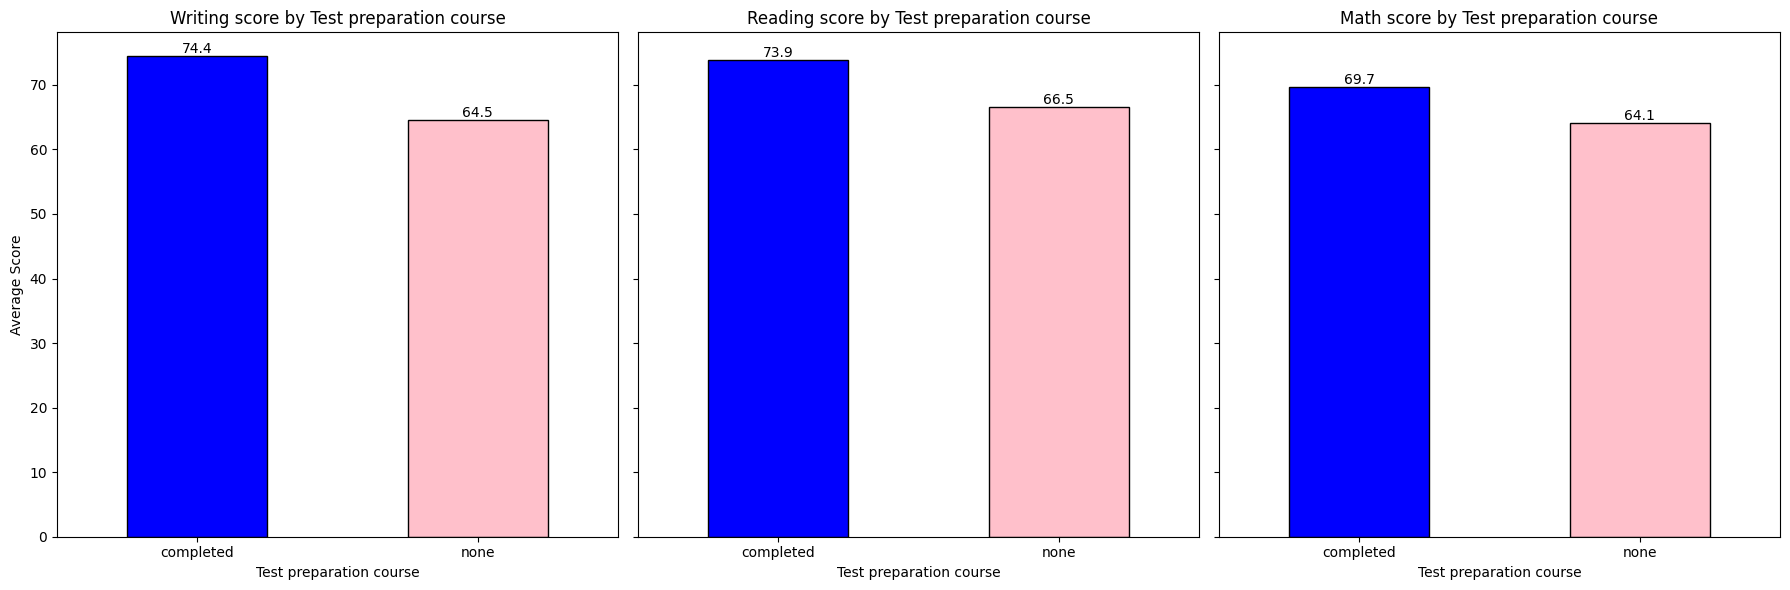

In [166]:
fig = plot_scores_by_gender(sp, 'test preparation course')
plt.show()

The graphs show that students who completed the test preparation course consistently outperform those who did not across all subjects. The largest improvement is in writing scores (74.4 vs. 64.5), highlighting the effectiveness of the course in boosting academic performance.

In [136]:
def plot_centums_and_below_30(df, test_prep_col, subjects, score_thresholds={'centum': 100, 'below': 30}):
    """
    Plot centums and scores below 30 by test preparation course for specified subjects.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame
    test_prep_col (str): Name of the column containing test preparation course data
    subjects (list): List of subject column names (e.g., ['reading score', 'writing score', 'math score'])
    score_thresholds (dict): Thresholds for centum and below scores (default: {'centum': 100, 'below': 30})
    
    Returns:
    matplotlib.figure.Figure: The created figure object
    """
    
    centums = {}
    below_threshold = {}
    
    for subject in subjects:
        centums[subject] = df[df[subject] == score_thresholds['centum']].groupby(test_prep_col).size()
        below_threshold[subject] = df[df[subject] < score_thresholds['below']].groupby(test_prep_col).size()
    
    # Align indices to ensure all test preparation courses are represented
    courses = df[test_prep_col].unique()
    for subject in subjects:
        centums[subject] = centums[subject].reindex(courses, fill_value=0)
        below_threshold[subject] = below_threshold[subject].reindex(courses, fill_value=0)
    
    # Combine data for centums and below-threshold scores
    centums_combined = pd.DataFrame(centums)
    below_threshold_combined = pd.DataFrame(below_threshold)
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    
    # Plot centums stacked bar chart
    centums_combined.plot(kind='bar', stacked=True, ax=axes[0], color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')
    axes[0].set_title(f'Centums by {test_prep_col}')
    axes[0].set_xlabel(test_prep_col)
    axes[0].set_ylabel('Number of Students')
    axes[0].legend(title='Subjects')
    
    # Add annotations for centums
    for container in axes[0].containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                axes[0].text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,
                    f'{int(height)}',
                    ha='center',
                    va='center',
                    fontsize=10,
                    color='black'
                )
    
    # Plot below-threshold stacked bar chart
    below_threshold_combined.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')
    axes[1].set_title(f'Scores Below {score_thresholds["below"]} by {test_prep_col}')
    axes[1].set_xlabel(test_prep_col)
    axes[1].legend(title='Subjects')
    
    # Add annotations for below-threshold scores
    for container in axes[1].containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                axes[1].text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,
                    f'{int(height)}',
                    ha='center',
                    va='center',
                    fontsize=10,
                    color='black'
                )
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

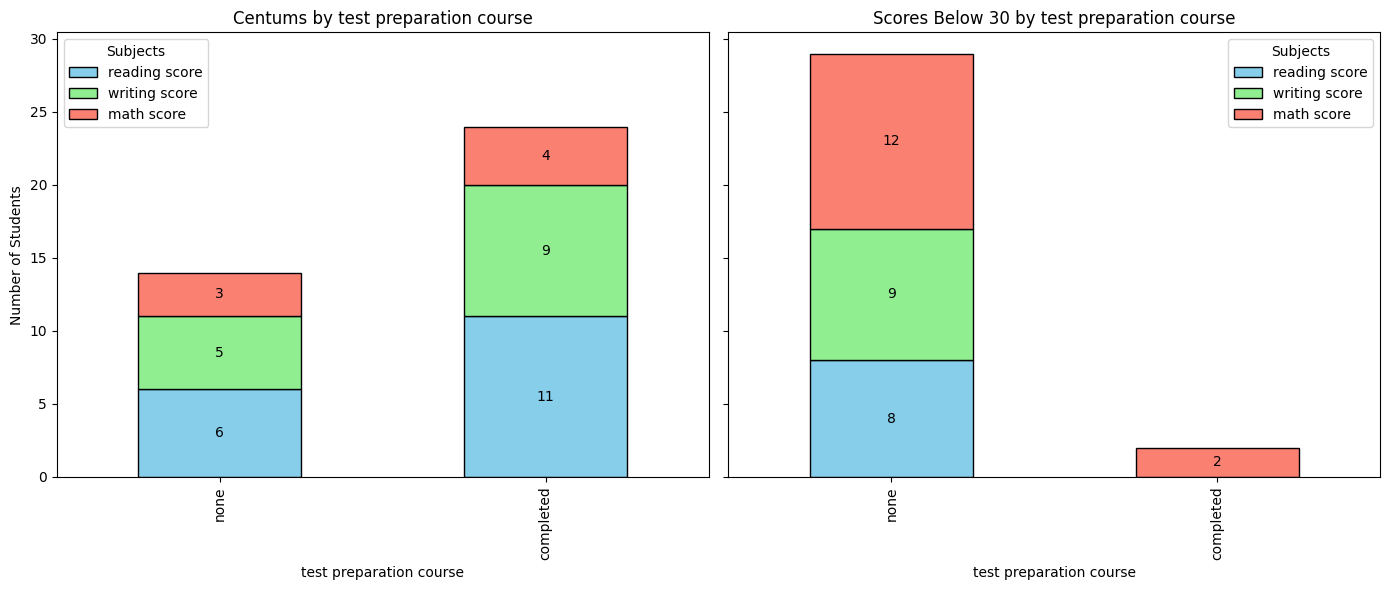

In [137]:
fig = plot_centums_and_below_30(sp, 'test preparation course', ['reading score', 'writing score', 'math score'])
plt.show()

The graphs highlight that students who completed the test preparation course achieved more centums, particularly in reading and writing, compared to those who did not. Additionally, students who did not complete the course had significantly more scores below 30, especially in math, emphasizing the course's effectiveness in improving performance.

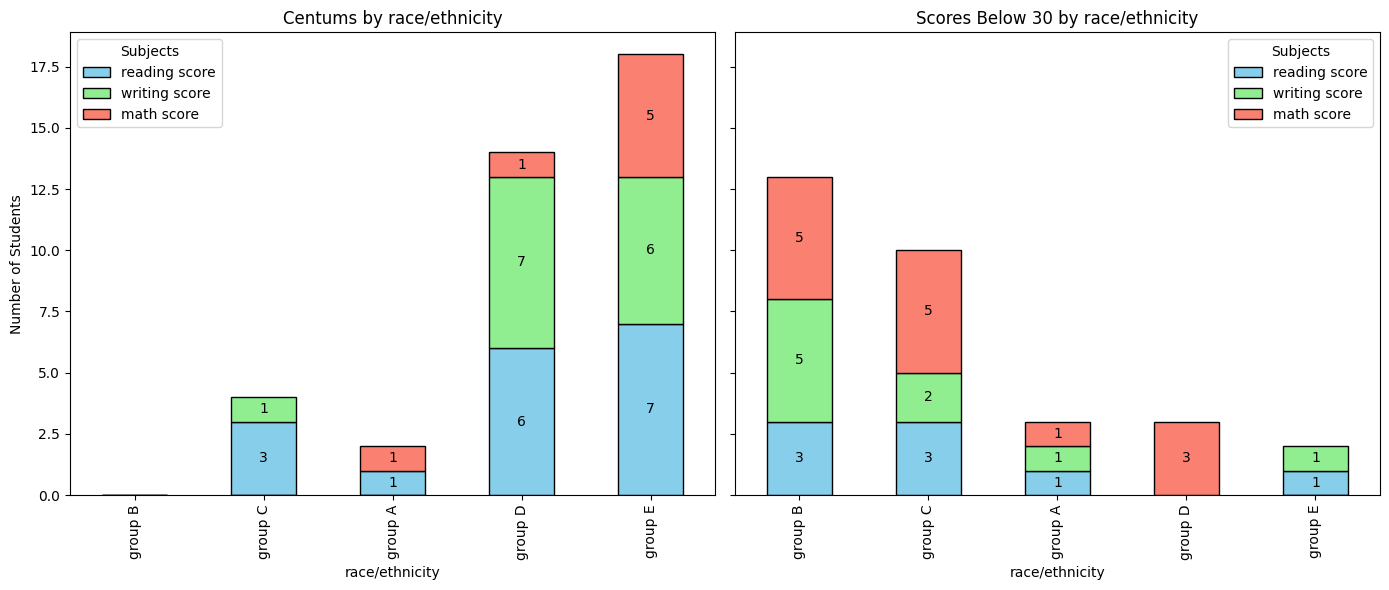

In [138]:
fig = plot_centums_and_below_30(sp, 'race/ethnicity', ['reading score', 'writing score', 'math score'])
plt.show()

The graphs highlight that Group E has the highest number of centums across all subjects, particularly in reading and writing. Conversely, Group B shows the highest number of scores below 30, especially in math, indicating disparities in performance across race/ethnicity groups.

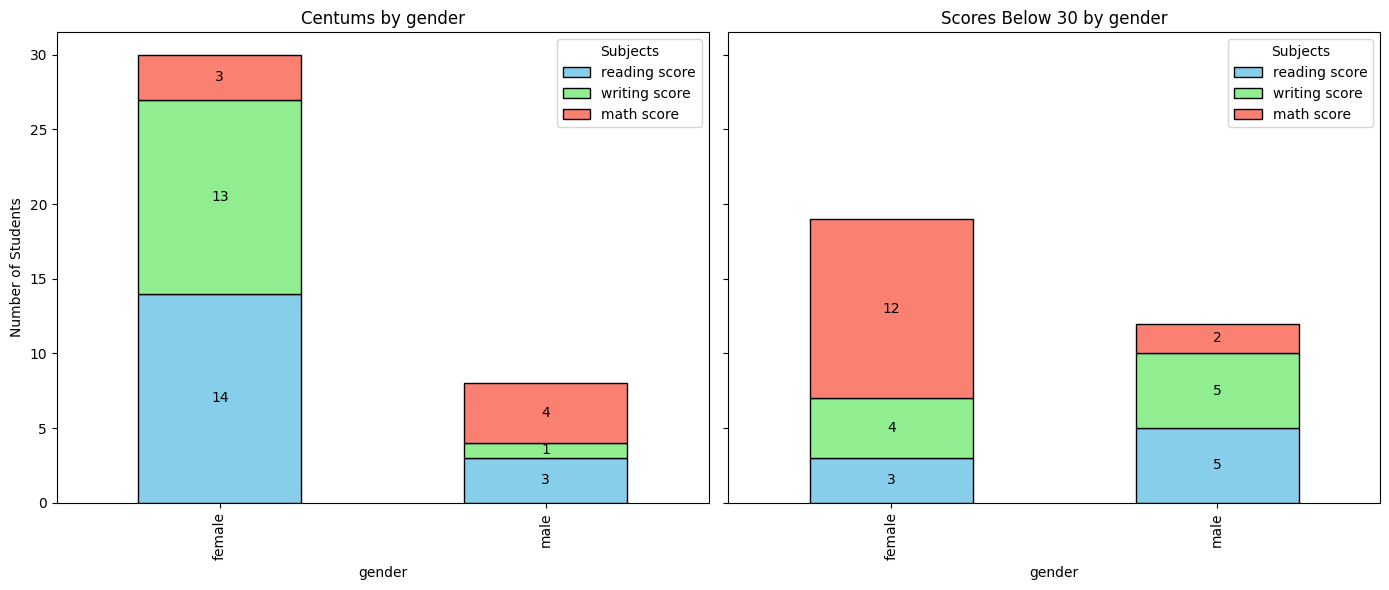

In [139]:
fig = plot_centums_and_below_30(sp, 'gender', ['reading score', 'writing score', 'math score'])
plt.show()

The graphs highlight that females have more centums (30 total) compared to males (8 total), particularly in writing and reading. Conversely, females also have more scores below 30 (19 total), especially in math, indicating a wider performance range across subjects.

In [126]:
def plot_average_scores(df, group_cols, subjects, figsize=(18, 6)):
    """
    Plot average scores for specified subjects grouped by given columns.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame
    group_cols (list): List of column names to group by (e.g., ['gender', 'test preparation course'])
    subjects (list): List of subject column names (e.g., ['reading score', 'writing score', 'math score'])
    figsize (tuple): Figure size (width, height)
    
    Returns:
    matplotlib.figure.Figure: The created figure object
    """
    
    # Calculate average scores
    average_scores = df.groupby(group_cols)[subjects].mean().reset_index()
    
    # Create side-by-side subplots for average scores
    fig, axes = plt.subplots(1, len(subjects), figsize=figsize, sharey=True)
    colors = ['skyblue', 'lightgreen']
    
    for i, subject in enumerate(subjects):
        ax = axes[i]
        for j, group in enumerate(average_scores[group_cols[1]].unique()):
            subset = average_scores[average_scores[group_cols[1]] == group]
            bars = ax.bar(
                subset[group_cols[0]] + f' ({group})',
                subset[subject],
                color=colors[j],
                label=group
            )
            
            # Add annotations on top of each bar
            for bar in bars:
                height = bar.get_height()
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + 1,
                    f'{height:.1f}',
                    ha='center',
                    va='bottom',
                    fontsize=8
                )
        
        ax.set_title(f'Average {subject.capitalize()} by {group_cols[0]} and {group_cols[1]}')
        ax.set_ylabel('Average Score')
        ax.legend(title=group_cols[1])
        ax.set_ylim(0, 100)  # Assuming scores are out of 100
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for each subplot
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

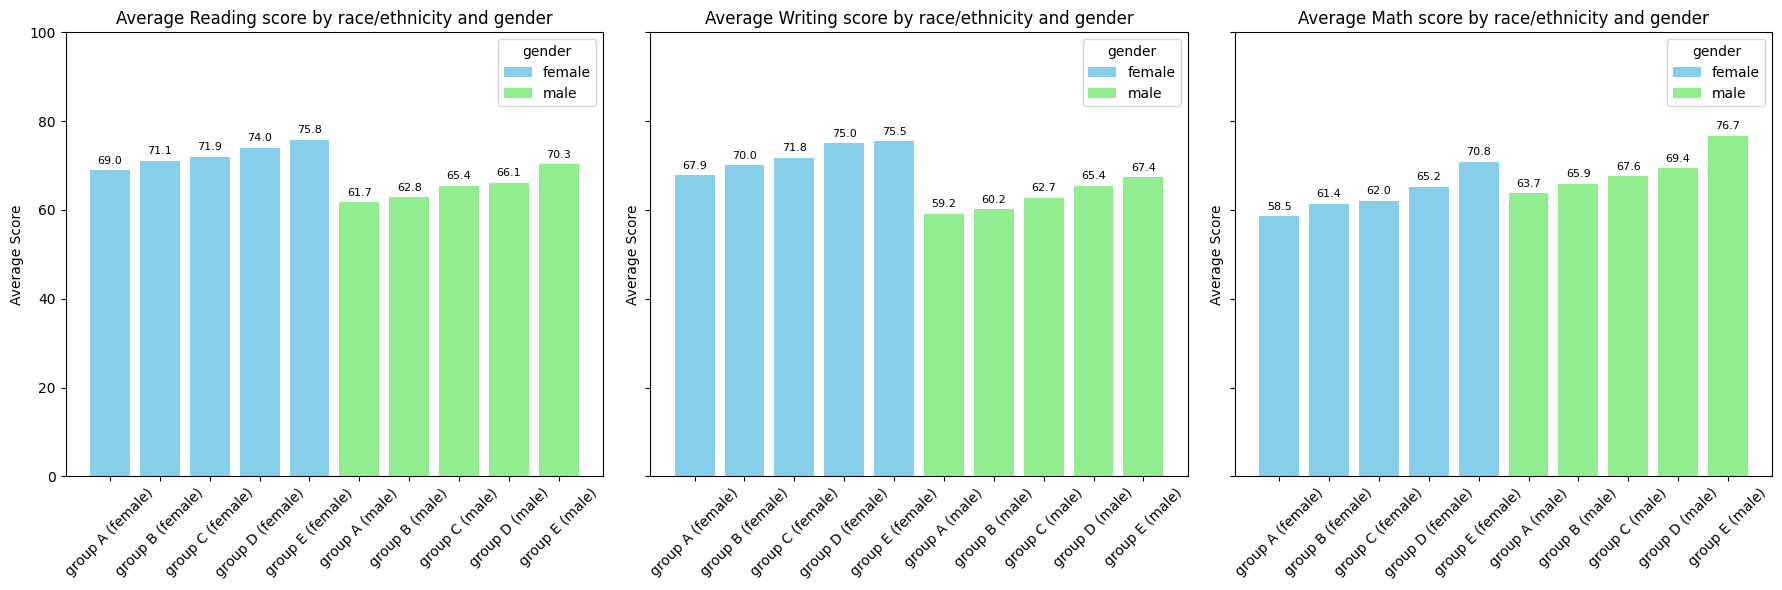

In [127]:
fig = plot_average_scores(sp, ['race/ethnicity', 'gender'], ['reading score', 'writing score', 'math score'])
plt.show()

The graphs show that females consistently outperform males in reading and writing scores across all race/ethnicity groups, with Group E females achieving the highest averages. However, males excel in math scores, particularly in Group E, where they achieve the highest overall average (76.7).

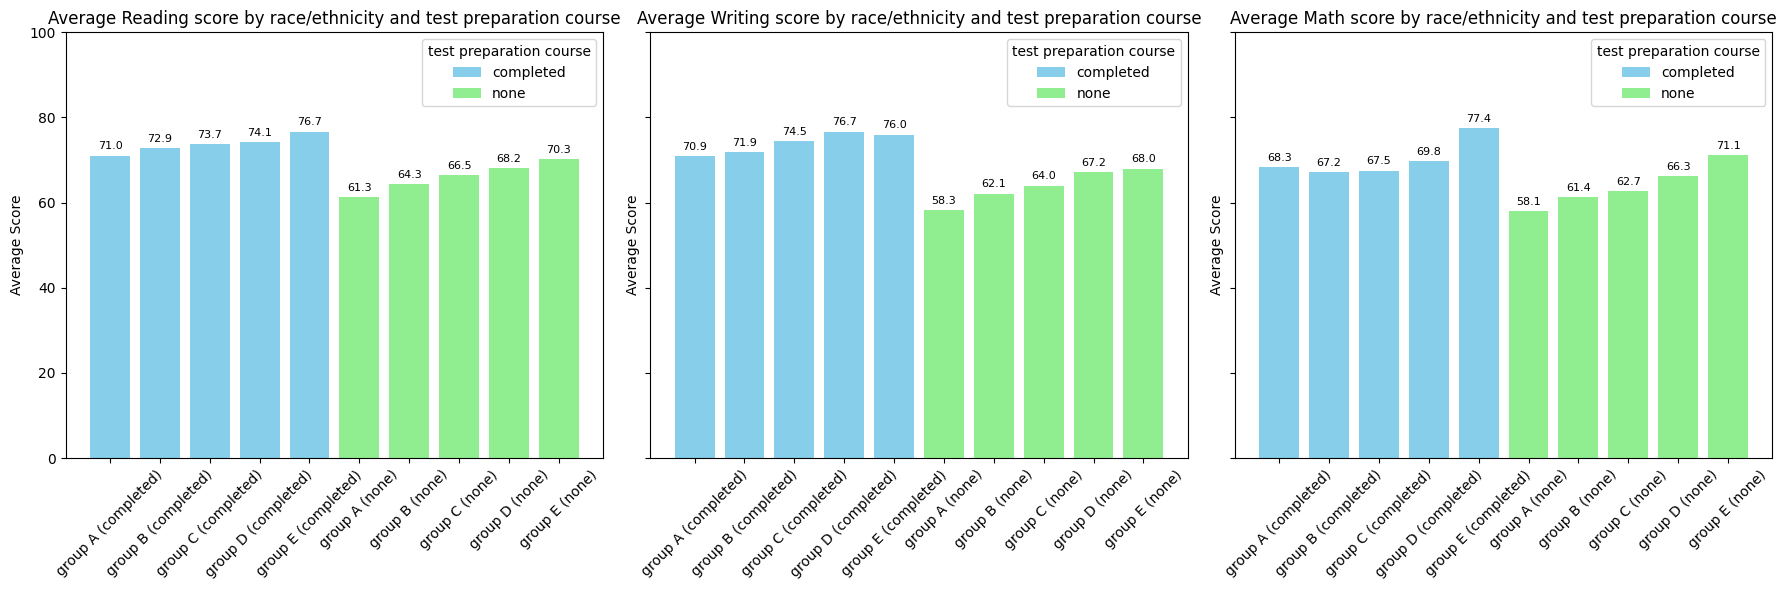

In [128]:
fig = plot_average_scores(sp, ['race/ethnicity', 'test preparation course'], ['reading score', 'writing score', 'math score'])
plt.show()


The graphs show that students who completed the test preparation course consistently achieved higher average scores across all subjects, with Group E performing the best overall. In contrast, students who did not complete the course had significantly lower scores, particularly in math and writing, highlighting the course's effectiveness.

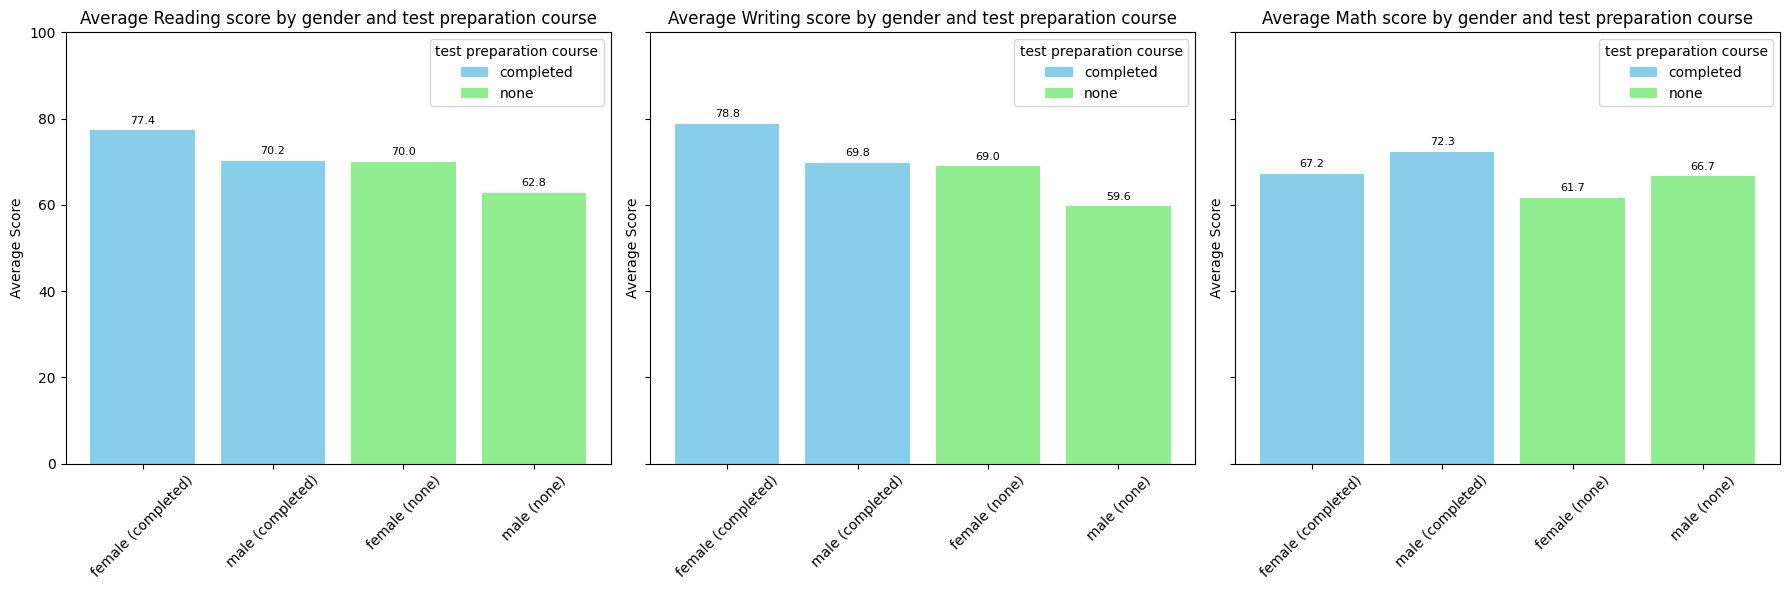

In [130]:
fig = plot_average_scores(sp, ['gender','test preparation course' ], ['reading score', 'writing score', 'math score'])
plt.show()

The graphs show that students who completed the test preparation course consistently achieved higher average scores across all subjects. Females outperform males in reading and writing, while males excel in math, with the largest improvement observed in writing scores for both genders after completing the course.

In [131]:
def plot_average_scores_by_race_gender(df, race_col, gender_col, score_col='average', figsize=(14, 6)):
    """
    Plot average scores by race/ethnicity and gender.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame
    race_col (str): Name of the column containing race/ethnicity data
    gender_col (str): Name of the column containing gender data
    score_col (str): Name of the column containing score data (default: 'average')
    figsize (tuple): Figure size (width, height)
    
    Returns:
    matplotlib.figure.Figure: The created figure object
    """
    
    # Calculate average scores
    average_scores = df.groupby([race_col, gender_col])[score_col].mean().reset_index()
    
    # Create subplots for average scores by gender and race/ethnicity
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
    
    # Define colors for genders
    colors = ['skyblue', 'lightgreen']
    
    # Plot average scores for each gender
    for i, gender in enumerate(average_scores[gender_col].unique()):
        subset = average_scores[average_scores[gender_col] == gender]
        bars = axes[i].bar(
            subset[race_col],
            subset[score_col],
            color=colors[i],
            label=gender,
            edgecolor='black'
        )
        
        # Add annotations on top of each bar
        for bar in bars:
            height = bar.get_height()
            axes[i].text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                f'{height:.1f}',
                ha='center',
                va='bottom',
                fontsize=10
            )
        
        # Set titles and labels
        axes[i].set_title(f'Average Scores by {race_col} ({gender.capitalize()})')
        axes[i].set_xlabel(race_col)
        axes[i].set_ylabel(f'Average {score_col.capitalize()}')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

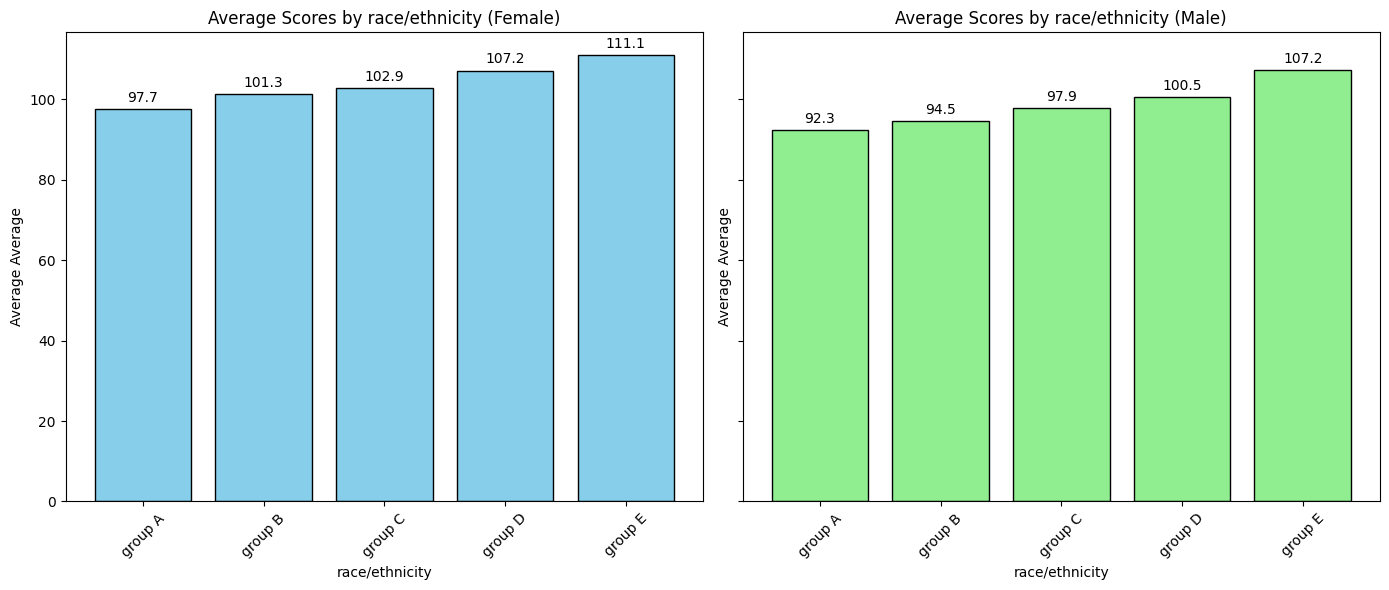

In [132]:
fig = plot_average_scores_by_race_gender(sp, 'race/ethnicity', 'gender')
plt.show()

The graphs show that Group E consistently achieves the highest average scores for both females (111.1) and males (107.2), indicating strong academic performance across genders. Conversely, Group A has the lowest averages (97.7 for females and 92.3 for males), highlighting disparities in performance among race/ethnicity groups.

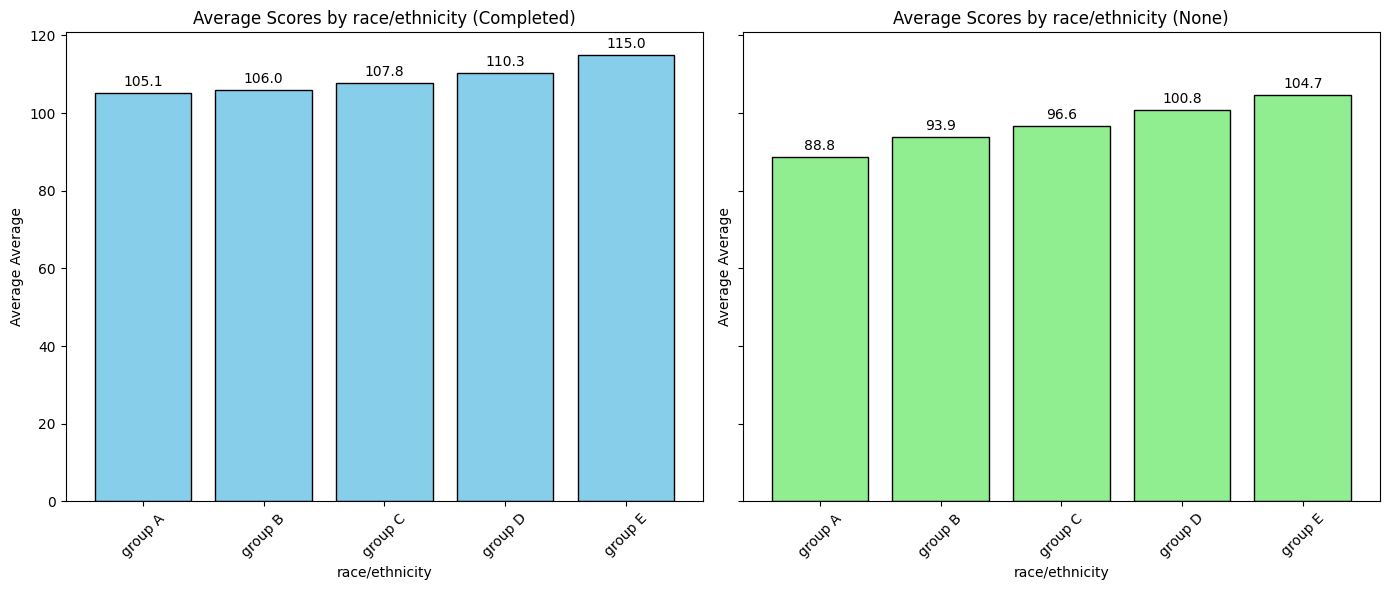

In [133]:
fig = plot_average_scores_by_race_gender(sp, 'race/ethnicity', 'test preparation course')
plt.show()

The graphs show that Group E consistently achieves the highest average scores, both for students who completed the test preparation course (115.0) and those who did not (104.7). Group A has the lowest averages in both cases, highlighting disparities in performance across race/ethnicity groups and the positive impact of completing the course.

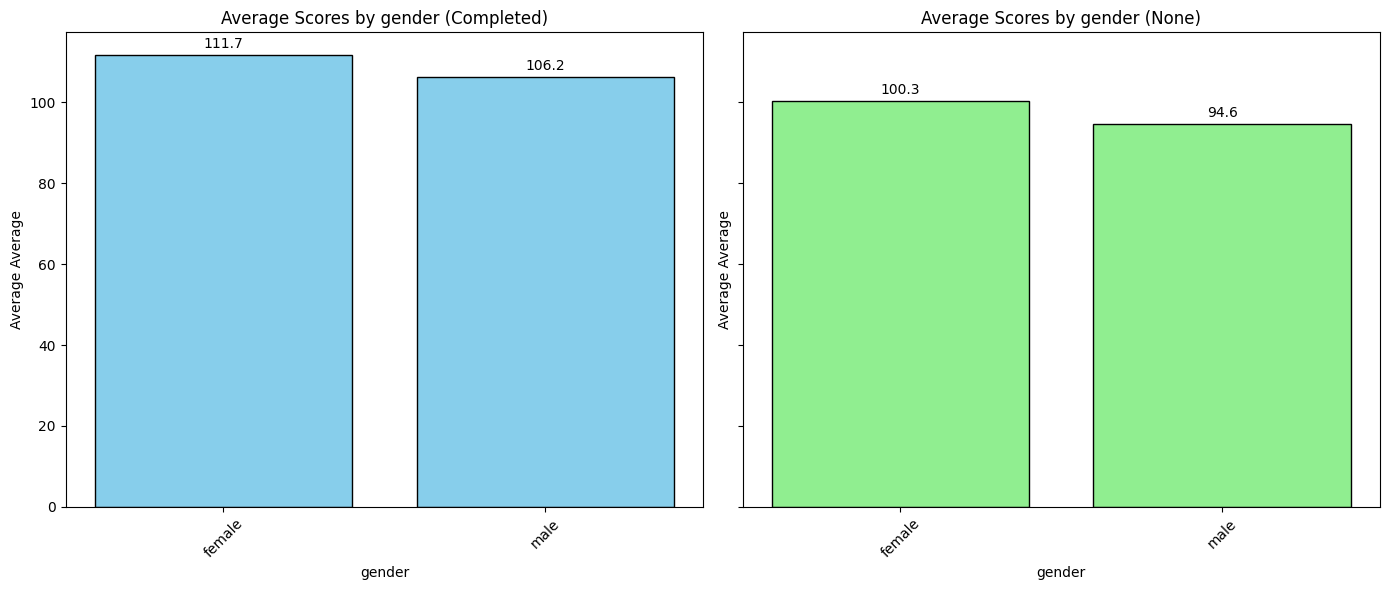

In [134]:
fig = plot_average_scores_by_race_gender(sp, 'gender','test preparation course')
plt.show()

The graphs show that females consistently outperform males in both test preparation categories. For students who completed the course, females scored an average of 111.7 compared to 106.2 for males, while for those who did not complete the course, females scored 100.3 compared to 94.6 for males, highlighting the gender-based performance gap.

In [144]:
zero_math_score_count = (sp['math score'] == 0).sum()
zero_math_score_count

1

In [146]:
sp[sp['math score'] == 0]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,average
59,female,group C,some high school,free/reduced,none,0,17,10,27,13.5
